<a href="https://colab.research.google.com/github/sharadnatarajSJSU/Fractalclustering_housingdata/blob/main/CMPE_257_Fractal_Clustering___new_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [236]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt


Reading data sets one by one as they have different features

In [237]:
avg_sales_price = pd.read_csv('/content/drive/MyDrive/SJSU assignment Docs/Spring 22/CMPE 257/Project Data/Factors affecting US house prices/Average_sales_prices_of_houses_sold_for_US.csv')

In [238]:
avg_sales_price.describe

<bound method NDFrame.describe of            DATE     ASPUS
0    1963-01-01   19300.0
1    1963-04-01   19400.0
2    1963-07-01   19200.0
3    1963-10-01   19600.0
4    1964-01-01   19600.0
..          ...       ...
227  2019-10-01  384600.0
228  2020-01-01  383000.0
229  2020-04-01  374500.0
230  2020-07-01  397800.0
231  2020-10-01  393300.0

[232 rows x 2 columns]>

In [239]:
gdp_data = pd.read_csv('/content/drive/MyDrive/SJSU assignment Docs/Spring 22/CMPE 257/Project Data/Factors affecting US house prices/GDP.csv')

In [240]:
gdp_data.describe

<bound method NDFrame.describe of            Date        GDP
0    01-01-1947    243.164
1    01-04-1947    245.968
2    01-07-1947    249.585
3    01-10-1947    259.745
4    01-01-1948    265.742
..          ...        ...
291  01-10-2019  21747.394
292  01-01-2020  21561.139
293  01-04-2020  19520.114
294  01-07-2020  21170.252
295  01-10-2020  21487.896

[296 rows x 2 columns]>

In [241]:
new_built_houses = pd.read_csv('/content/drive/MyDrive/SJSU assignment Docs/Spring 22/CMPE 257/Project Data/Factors affecting US house prices/Newly_built_house.csv')

In [242]:
new_built_houses.describe()

,House
count,188.000000
mean,174.340426
std,64.076083
min,53.000000
25%,131.000000
50%,170.000000
75%,210.000000
max,386.000000


In [243]:
population_data = pd.read_csv('/content/drive/MyDrive/SJSU assignment Docs/Spring 22/CMPE 257/Project Data/Factors affecting US house prices/demographic.csv')

In [244]:
population_data.describe()

,PersonNumber
count,5.290000e+02
mean,1.756509e+08
std,2.268925e+07
min,1.352373e+08
25%,1.554041e+08
50%,1.743375e+08
75%,1.986966e+08
max,2.073428e+08


In [245]:
rawmat_data = pd.read_csv('/content/drive/MyDrive/SJSU assignment Docs/Spring 22/CMPE 257/Project Data/Factors affecting US house prices/raw_material_avg.csv')

In [246]:
rawmat_data.describe()

,PRAWMINDEXM
count,373.000000
mean,95.237557
std,21.971804
min,60.097596
25%,75.442087
50%,94.837499
75%,105.674105
max,187.205271


In [247]:
unemployment_data = pd.read_csv('/content/drive/MyDrive/SJSU assignment Docs/Spring 22/CMPE 257/Project Data/Factors affecting US house prices/Unemployment.csv')

In [248]:
unemployment_data.describe()

,Unemployment
count,877.000000
mean,5.767275
std,1.706036
min,2.500000
25%,4.500000
50%,5.600000
75%,6.800000
max,14.800000


In [249]:
permit_data = pd.read_csv('/content/drive/MyDrive/SJSU assignment Docs/Spring 22/CMPE 257/Project Data/Factors affecting US house prices/PERMIT.csv')

In [250]:
permit_data.describe()

,Permit
count,733.000000
mean,1358.459754
std,382.962139
min,513.000000
25%,1098.000000
50%,1332.000000
75%,1638.000000
max,2419.000000


In [251]:
mortgage_data = pd.read_csv('/content/drive/MyDrive/SJSU assignment Docs/Spring 22/CMPE 257/Project Data/Factors affecting US house prices/Mortgage.csv')

In [252]:
mortgage_data.describe()

,Mortgage
count,2605.000000
mean,7.883731
std,3.255399
min,2.650000
25%,5.530000
50%,7.510000
75%,9.670000
max,18.630000


Some of the data has different timelines.

In [253]:
def monthly_to_quarterly(df):
  temp_data = df[ : :3]
  temp_data.reset_index()
  return temp_data

In [254]:
population_data = monthly_to_quarterly(population_data)

In [255]:
population_data.head(10)

,Date,PersonNumber
0,01-01-1977,135237302.5
3,01-04-1977,135777998.6
6,01-07-1977,136564947.2
9,01-10-1977,137161868.4
12,01-01-1978,137649366.4
15,01-04-1978,138161011.7
18,01-07-1978,138840684.5
21,01-10-1978,139392778.2
24,01-01-1979,140010460.1
27,01-04-1979,140490908.3


In [256]:
rawmat_data = monthly_to_quarterly(rawmat_data)

In [257]:
permit_data = monthly_to_quarterly(permit_data)

In [258]:
unemployment_data = monthly_to_quarterly(unemployment_data)

Moving on to structuring other data which is weekly

In [259]:
mortgage_data.head(20)

,Date,Mortgage
0,02-04-1971,7.33
1,09-04-1971,7.31
2,16-04-1971,7.31
3,23-04-1971,7.31
4,30-04-1971,7.29
5,07-05-1971,7.38
6,14-05-1971,7.42
7,21-05-1971,7.44
8,28-05-1971,7.46
9,04-06-1971,7.52


In [260]:
mortgage_data.dtypes

Date         object
Mortgage    float64
dtype: object

In [261]:
testing_data = mortgage_data.copy()

In [262]:
testing_data.dtypes

Date         object
Mortgage    float64
dtype: object

In [263]:
testing_data.Date = pd.to_datetime(testing_data.Date,format= '%d-%m-%Y')


In [264]:
testing_data.set_index('Date', inplace=True)

In [265]:
testing_data.dtypes

Mortgage    float64
dtype: object

In [266]:
testing_data.head()

,Mortgage
Date,
1971-04-02,7.33
1971-04-09,7.31
1971-04-16,7.31
1971-04-23,7.31
1971-04-30,7.29


Resampling to the data to quarterly and taking the mean of mortgage.

In [267]:
testing_data.resample('QS').mean()

,Mortgage
Date,
1971-04-01,7.413077
1971-07-01,7.658462
1971-10-01,7.552857
1972-01-01,7.349231
1972-04-01,7.346923
...,...
2020-01-01,3.521538
2020-04-01,3.239231
2020-07-01,2.952308


merging all dataframes into one

In [268]:
def merge_data(df,new_df):
  columns = df.columns
  new_df[columns[1]] = df.iloc[:, 1]
  return new_df


In [269]:
df_list = [population_data,gdp_data,mortgage_data,new_built_houses,rawmat_data,unemployment_data,permit_data]

In [270]:
merged_data = avg_sales_price.copy()

In [271]:
merged_data.head()

,DATE,ASPUS
0,1963-01-01,19300.0
1,1963-04-01,19400.0
2,1963-07-01,19200.0
3,1963-10-01,19600.0
4,1964-01-01,19600.0


In [282]:
for df in df_list:
  merged_data = merge_data(df,merged_data)

In [283]:
columns = merged_data.columns

In [284]:
for c in columns:
  print(c,merged_data[c].isna().sum())

DATE 0
ASPUS 0
PersonNumber 154
GDP 0
Mortgage 0
House 44
PRAWMINDEXM 154
Unemployment  154
Permit 154


Lot of null values in some columns.

In [310]:
for c in columns:
  if(c != 'DATE'):
    merged_data[c].fillna(merged_data[c].mean(),inplace=True)

Imputed all missing values

In [286]:
for c in columns:
  print(c,merged_data[c].isna().sum())

DATE 0
ASPUS 0
PersonNumber 0
GDP 0
Mortgage 0
House 0
PRAWMINDEXM 0
Unemployment  0
Permit 0


In [291]:
merged_data = merged_data.set_index('DATE')

Converting Data which is string to datetime

Scaling the data

In [276]:
from sklearn.preprocessing import StandardScaler

In [277]:
std_scaler = StandardScaler()

In [309]:
merged_data.dtypes

ASPUS            float64
PersonNumber     float64
GDP              float64
Mortgage         float64
House            float64
PRAWMINDEXM      float64
Unemployment     float64
Permit           float64
dtype: object

In [279]:
merged_data.head(10)

,DATE,ASPUS
0,1963-01-01,19300.0
1,1963-04-01,19400.0
2,1963-07-01,19200.0
3,1963-10-01,19600.0
4,1964-01-01,19600.0
5,1964-04-01,20200.0
6,1964-07-01,20500.0
7,1964-10-01,20900.0
8,1965-01-01,21500.0
9,1965-04-01,21000.0


In [305]:
df_scaled = std_scaler.fit_transform(merged_data)

In [308]:
df_scaled.shape

(232, 8)

In [318]:
merged_data.columns

Index(['ASPUS', 'PersonNumber', 'GDP', 'Mortgage', 'House', 'PRAWMINDEXM',
       'Unemployment ', 'Permit'],
      dtype='object')

In [319]:
merged_data.reset_index()

,DATE,ASPUS,PersonNumber,GDP,Mortgage,House,PRAWMINDEXM,Unemployment,Permit
0,1963-01-01,19300.0,1.352373e+08,243.164,7.33,117.000000,72.855085,3.400000,1092.000000
1,1963-04-01,19400.0,1.530389e+08,245.968,7.31,165.000000,83.628605,4.820513,1365.820513
2,1963-07-01,19200.0,1.530389e+08,249.585,7.31,122.000000,83.628605,4.820513,1365.820513
3,1963-10-01,19600.0,1.357780e+08,259.745,7.31,97.000000,76.022077,3.900000,1016.000000
4,1964-01-01,19600.0,1.530389e+08,265.742,7.29,91.000000,83.628605,4.820513,1365.820513
...,...,...,...,...,...,...,...,...,...
227,2019-10-01,384600.0,1.530389e+08,11769.275,8.89,174.340426,83.628605,4.820513,1365.820513
228,2020-01-01,383000.0,1.679752e+08,11920.169,8.93,174.340426,92.051375,3.900000,1461.000000
229,2020-04-01,374500.0,1.530389e+08,12108.987,8.98,174.340426,83.628605,4.820513,1365.820513
230,2020-07-01,397800.0,1.530389e+08,12303.340,9.02,174.340426,83.628605,4.820513,1365.820513


In [320]:
merged_data.columns

Index(['ASPUS', 'PersonNumber', 'GDP', 'Mortgage', 'House', 'PRAWMINDEXM',
       'Unemployment ', 'Permit'],
      dtype='object')

Visualizing the Data to understand it better

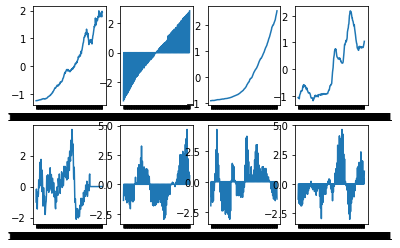

In [324]:
k=0

fig, axs = plt.subplots(2, 4)
for i in range(0,2):
  for j in range(0,4):
    axs[i,j].plot(merged_data.index, df_scaled[: ,k])
    k+=1
                  


In [326]:
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn import metrics

In [330]:
def plot_cluster(df, max_loop=50):
    """
    Looking at the performance of various number of clusters using K-Means.
    Performance is evaluated by within cluster SSE and silhouette score.
    """
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:,1:]
    
    # robust scaling is used so that the centering and scaling statistics are therefore not influenced by a few number of very large marginal outliers as they are based on percentiles
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)
    
    sse_within_cluster = {}
    silhouette_score = {}
    
    for k in range(2, max_loop):
        kmeans = KMeans(n_clusters=k,  random_state=10)
        kmeans.fit(X_rb)
        sse_within_cluster[k] = kmeans.inertia_
        silhouette_score[k] = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)

    _ = plt.figure(figsize=(10,6))
    ax1 = plt.subplot(211)
    _ = plt.plot(list(sse_within_cluster.keys()), list(sse_within_cluster.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("SSE Within Cluster")
    _ = plt.title("Within Cluster SSE After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)
    
    ax2 = plt.subplot(212)
    _ = plt.plot(list(silhouette_score.keys()), list(silhouette_score.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("Silhouette Score")
    _ = plt.title("Silhouette Score After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)
    
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)

In [328]:
cluster_data = pd.DataFrame(df_scaled)

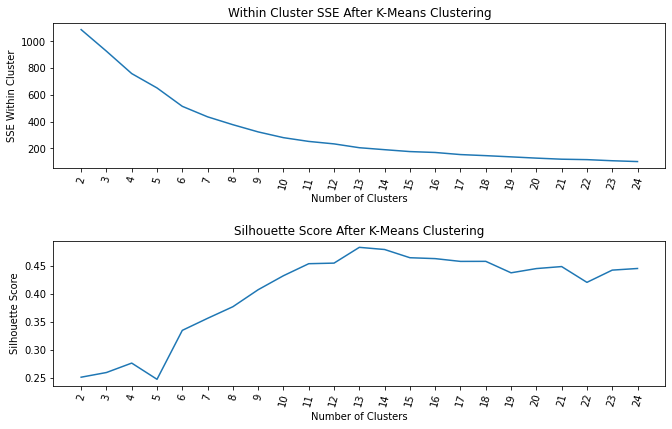

In [331]:
plot_cluster(cluster_data, max_loop=25)

Choosing 13 as the Ideal number of clusters

In [336]:
def apply_cluster(df, clusters):
    """
    Applying K-Means with the optimal number of clusters identified
    """
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:,1:]
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)
    kmeans = KMeans(n_clusters=clusters, random_state=10)  
    kmeans.fit(X_rb) 
    score = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)
    df['cluster'] = kmeans.labels_
    sse_within_cluster = kmeans.inertia_
    
    print("clustering performance")
    print("-----------------------------------")
    print("silhouette score: " + str(score))
    print("sse withing cluster: " + str(sse_within_cluster))
    
    return df

We also need an index to check the performance of our clustering. We will be using a value index insipired by a large online real estate agency.

We will be using regression to learn how the index works and calculate the average index for our clusters

In [338]:
price_index = pd.read_csv('/content/drive/MyDrive/SJSU assignment Docs/Spring 22/CMPE 257/Project Data/Factors affecting US house prices/Housing_price_index(given).csv')

In [340]:
price_index.head()

,DATE,CSUSHPISA
0,1987-01-01,63.965
1,1987-02-01,64.425
2,1987-03-01,64.736
3,1987-04-01,65.135
4,1987-05-01,65.569


The Index is on a monthly period. So we wil again convert it to quarterly. The inde

In [341]:
price_index = monthly_to_quarterly(price_index)

In [342]:
price_index.head()

,DATE,CSUSHPISA
0,1987-01-01,63.965
3,1987-04-01,65.135
6,1987-07-01,66.509
9,1987-10-01,67.740
12,1988-01-01,68.859


In [357]:
price_index.drop(columns = ['DATE'])
price_index.set_index('DATE')


,CSUSHPISA
DATE,
1987-01-01,63.965
1987-04-01,65.135
1987-07-01,66.509
1987-10-01,67.740
1988-01-01,68.859
...,...
2019-10-01,211.593
2020-01-01,214.552
2020-04-01,217.656


In [354]:
df_scaled.shape

(232, 8)

In [358]:
price_index.shape

(136, 2)

In [359]:
price_index.columns

Index(['DATE', 'CSUSHPISA'], dtype='object')

In [361]:
price_index= price_index.drop(columns=['DATE'])

In [362]:
price_index.shape

(136, 1)

The Target variable will be the index and the features will be our scaled data that was merged. For this we will use SVM regression with polynomial kernels

In [348]:
from sklearn.svm import SVR

In [349]:
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)

In [364]:
merged_data.head(10)

,ASPUS,PersonNumber,GDP,Mortgage,House,PRAWMINDEXM,Unemployment,Permit
DATE,,,,,,,,
1963-01-01,19300.0,1.352373e+08,243.164,7.33,117.0,72.855085,3.400000,1092.000000
1963-04-01,19400.0,1.530389e+08,245.968,7.31,165.0,83.628605,4.820513,1365.820513
1963-07-01,19200.0,1.530389e+08,249.585,7.31,122.0,83.628605,4.820513,1365.820513
1963-10-01,19600.0,1.357780e+08,259.745,7.31,97.0,76.022077,3.900000,1016.000000
1964-01-01,19600.0,1.530389e+08,265.742,7.29,91.0,83.628605,4.820513,1365.820513
1964-04-01,20200.0,1.530389e+08,272.567,7.38,153.0,83.628605,4.820513,1365.820513
1964-07-01,20500.0,1.365649e+08,279.196,7.42,150.0,76.236284,3.600000,999.000000
1964-10-01,20900.0,1.530389e+08,280.366,7.44,138.0,83.628605,4.820513,1365.820513
1965-01-01,21500.0,1.530389e+08,275.034,7.46,147.0,83.628605,4.820513,1365.820513


In [366]:
svm_data = merged_data.iloc[-136: , :]

In [367]:
svm_data = std_scaler.transform(svm_data)

In [408]:
svm_data

array([[-0.38584521, -0.46282358, -0.66800181, ..., -1.47485093,
        -1.14389694, -0.87853336],
       [-0.34065444,  0.        , -0.66201117, ...,  0.        ,
         0.        ,  0.        ],
       [-0.30825351,  0.        , -0.65593853, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.77734301,  0.        ,  2.44543932, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.97601185,  0.        ,  2.50058019, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.93764233,  2.8566411 ,  2.56273791, ...,  0.7222082 ,
        -1.42272182,  1.08713379]])

In [412]:
svr_poly.fit(svm_data,price_index)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=100, coef0=1, gamma='auto', kernel='poly')

In [409]:
price_index

,CSUSHPISA
0,63.965
3,65.135
6,66.509
9,67.740
12,68.859
...,...
393,211.593
396,214.552
399,217.656
402,219.650


First Run

In [399]:
first_trial = apply_cluster(cluster_data, clusters=13)

clustering performance
-----------------------------------
silhouette score: 0.48262821302834563
sse withing cluster: 204.61684605344135


In [400]:
cluster_data.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 'cluster'], dtype='object')

In [404]:
cluster_perf_df = (
    first_trial
    .groupby('cluster')
    .agg({0 :"mean",1:"mean", 2:"mean", 3:"mean", 4:"mean", 5:"mean",6:"mean", 7:"mean"})
)

In [405]:
cluster_perf_df.head()

,0,1,2,3,4,5,6,7
cluster,,,,,,,,
0,1.668914,2.459087,1.909054,0.928101,0.000000,2.551846,-0.760513,1.239967
1,-0.797664,-0.017764,-0.768142,-0.867561,0.136913,0.003437,-0.031159,-0.021525
2,0.325185,0.826827,0.124242,0.426604,-1.339201,-1.820729,1.449174,3.341538
3,1.336123,0.000000,1.413039,1.285056,-0.054884,0.000000,0.000000,0.000000
4,-1.216865,-2.693244,-0.898332,-0.892976,-0.649092,-1.288230,-1.178750,-1.328803


In [413]:
price_index_cluster = svr_poly.predict(cluster_perf_df)

In [414]:
price_index_cluster

array([179.63828453,  39.75037883, 104.63989524, 160.94348712,
         2.78359531,  75.44660929,  78.15286633, 162.48019356,
       -24.66174231,  13.6406039 ,  68.03038542,  46.96931041,
        72.98206014])

By Looking at the prediction, cluster 0 has higher average value prediction. We will perform K means again on Cluster 0

In [418]:
cluster_0 = cluster_data.query("cluster==0").reset_index(drop=True)

In [422]:
cluster_0.drop(columns='cluster')

,0,1,2,3,4,5,6,7
0,1.095218,2.047561,1.316940,1.460415,0.0,2.531516,0.110815,-0.568165
1,1.316056,2.166652,1.426856,1.184252,0.0,1.930582,0.389640,0.278295
2,1.409848,2.214925,1.525491,0.968124,0.0,2.523168,0.110815,0.471099
3,1.733858,2.322019,1.646783,0.776011,0.0,2.809130,-0.028597,1.383395
4,1.546273,2.391022,1.756826,0.715975,0.0,2.327839,-0.586247,1.510364
5,1.635802,2.430449,1.917358,0.848053,0.0,2.567148,-0.865072,1.844245
6,1.779901,2.464697,1.981251,0.848053,0.0,3.396138,-1.143897,1.759599
7,1.992212,2.553933,2.034423,0.824039,0.0,3.893589,-1.422722,2.737730
8,1.934232,2.614392,2.128548,0.800025,0.0,4.674756,-1.422722,1.975916
9,1.796101,2.690710,2.219570,0.812032,0.0,2.180235,-1.562134,1.952404


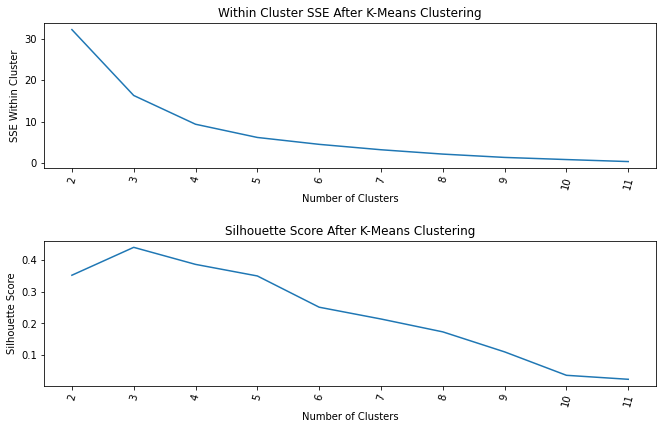

In [424]:
plot_cluster(cluster_0, max_loop=12)

Choosing the number of clusters as 3

In [425]:
second_trial= apply_cluster(cluster_0, clusters=3)

clustering performance
-----------------------------------
silhouette score: 0.43962251356202925
sse withing cluster: 16.317621329790732


In [426]:
cluster_perf_df = (
    second_trial
    .groupby('cluster')
    .agg({0 :"mean",1:"mean", 2:"mean", 3:"mean", 4:"mean", 5:"mean",6:"mean", 7:"mean"})
)

In [427]:
cluster_perf_df

,0,1,2,3,4,5,6,7
cluster,,,,,,,,
0,1.774054,2.495317,1.954966,0.803455,0.0,3.121262,-1.004484,1.880522
1,1.273708,2.143046,1.423096,1.204264,0.0,2.328422,0.203757,0.060410
2,1.893731,2.806340,2.477303,0.950114,0.0,0.894026,-1.353016,0.767360


In [428]:
price_index_cluster = svr_poly.predict(cluster_perf_df)

In [429]:
price_index_cluster

array([185.20473197, 152.58691201, 221.46546975])

Price Index is 221 the highest. This would mean that cluster 3 would be an ideal economic environment where the house prices are soaring. This is the golden cluster.